## Libraries import and constants declaration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree, svm, neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

RANDOM_SEED = 42

## Data exploration

Load the data.

In [2]:
courses_data = pd.read_csv("online_course_engagement_data.csv")

General statistical description of each feature in the dataset.

In [4]:
courses_data.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


Dataset preview.

In [5]:
courses_data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


Define course subjects mapping

In [77]:
categories_mapping={
    'Health': 1,
    'Arts': 2,
    'Science': 3,
    'Programming': 4,
    'Business': 5
}

Find correlations between the different values.

Based on the correlations found we can conclude that:
- There is a strong correlation between the CompletionRate and the CourseCompletion, the hypotesis is: The more content the student has completed the more likely is for the student to complete the course.

- We see another strong correlation with the QuizScores, which lead us to think that the better the scores a student gets, the more likely is for the student to feel motivated to complete the course.

- Another strong colletion is based on the number of quizes taken, maybe the number of quizes is the evaluation criteria in order to consider a course as completed.

In [78]:
correlation_data = courses_data.copy()


correlation_data['CourseCategory'] = correlation_data['CourseCategory'].map(categories_mapping)

correlation_data.head()

corr_matrix = correlation_data.corr()
corr_matrix["CourseCompletion"].sort_values(ascending=False)

CourseCompletion         1.000000
CompletionRate           0.326139
QuizScores               0.299983
NumberOfQuizzesTaken     0.284504
NumberOfVideosWatched    0.234360
TimeSpentOnCourse        0.182553
UserID                   0.021093
CourseCategory           0.011329
DeviceType               0.007551
Name: CourseCompletion, dtype: float64

## Data Visualization

We can conclude that:
- Is less likely for students that start a course to actually complete that course.

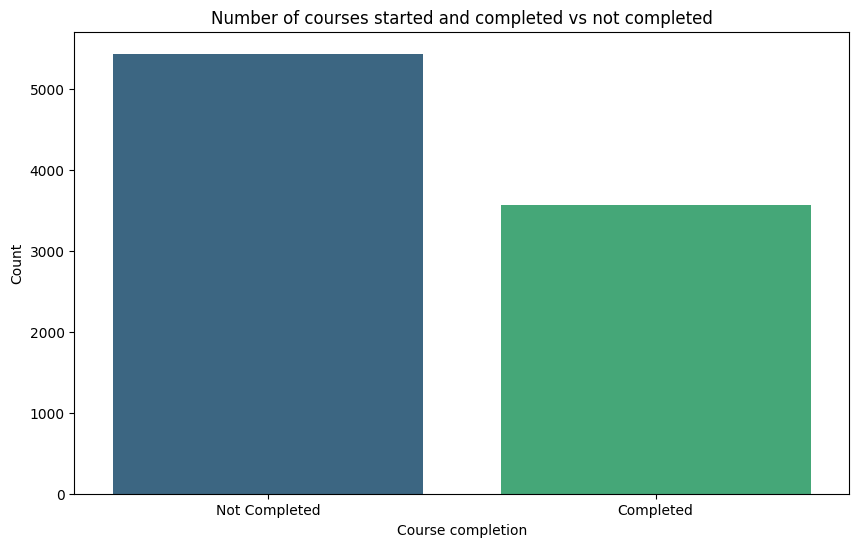

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="CourseCompletion", data=courses_data, palette="viridis")
plt.title("Number of courses started and completed vs not completed")
plt.xlabel("Course completion")
plt.ylabel("Count")

ax.set_xticklabels(["Not Completed", "Completed"])
plt.show()

We can conclude that:
- Students that enroll in courses related to Business and Programming have a slightly higher chance to complete the course in comparison with courses on another subject of knowledge.

- Students feel slighly less attracted to Art courses.

/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

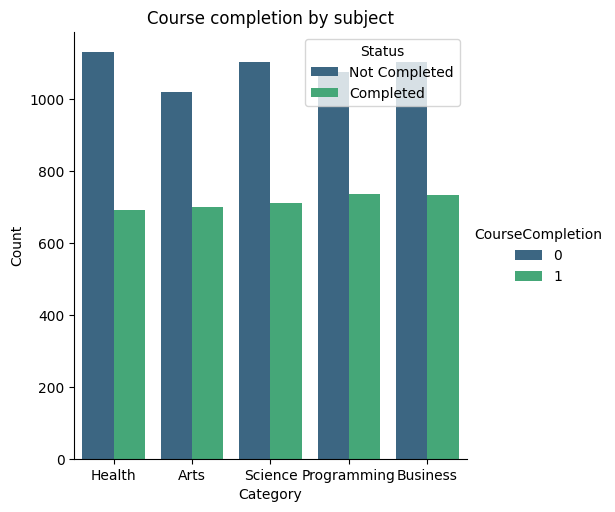

In [4]:
plt.figure(figsize=(12, 8))
sns.catplot(x="CourseCategory", hue="CourseCompletion", kind="count", data=courses_data, palette="viridis")
plt.title("Course completion by subject")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Status", labels=["Not Completed", "Completed"])

plt.show()

We can conclude that:
- All the students score at least 50% on the Quizzes.

- No comments on the Number of Quizzes taken.

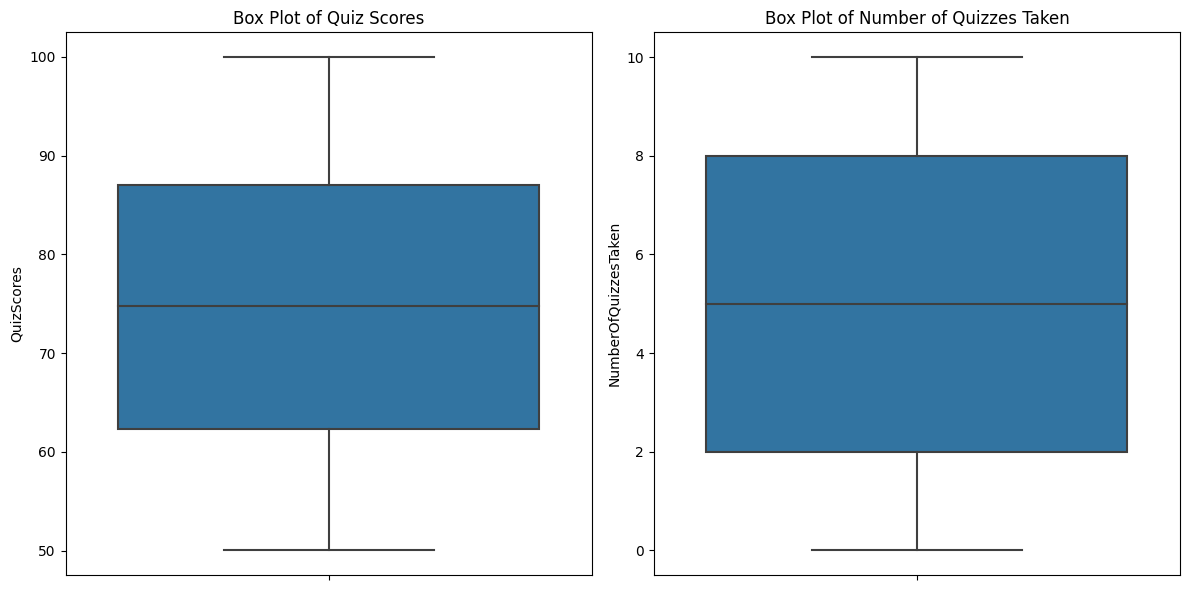

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=courses_data["QuizScores"])
plt.title("Box Plot of Quiz Scores")
plt.ylabel("QuizScores")

plt.subplot(1, 2, 2)
sns.boxplot(y=courses_data["NumberOfQuizzesTaken"])
plt.title("Box Plot of Number of Quizzes Taken")
plt.ylabel("NumberOfQuizzesTaken")

plt.tight_layout()
plt.show()

We can conclude that: 
- The higher the Completion Rate (Course content completed by the student) the higher the chances are for a student to complete the course.

/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

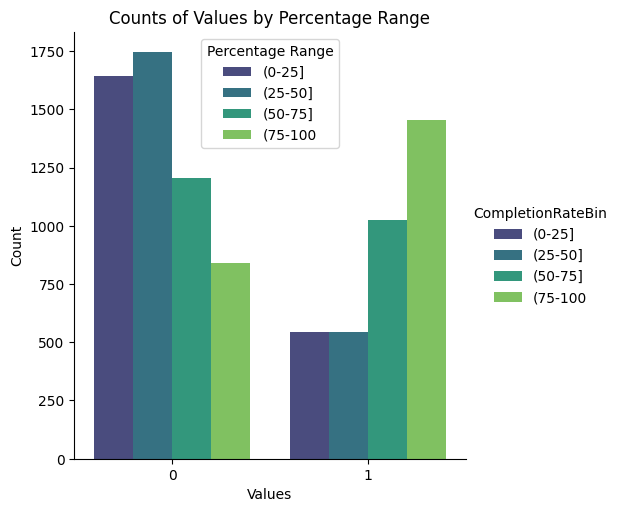

In [5]:
bins = [0, 25, 50, 75, 100]
labels = ["[0-25]", "(25-50]", "(50-75]", "(75-100]"]
courses_data["CompletionRateBins"] = pd.cut(courses_data["CompletionRate"], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(12, 8))
sns.catplot(x="CourseCompletion", hue="CompletionRateBins", kind="count", data=courses_data, palette='viridis')
plt.title("Counts of Values by Percentage Range")
plt.xlabel("Values")
plt.ylabel("Count")
plt.legend(title="Percentage Range")
plt.show()

# Droping helper column after usage
courses_data = courses_data.drop("CompletionRateBins", axis=1)

# Data Preprocessing

Sanity check for null values

In [135]:
courses_data.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

Changing categorical values to quantitative values.

In [136]:
courses_data["CourseCategory"] = courses_data["CourseCategory"].map(categories_mapping)

courses_data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,1,29.979719,17,3,50.365656,20.860773,1,0
1,4326,2,27.802640,1,5,62.615970,65.632415,1,0
2,5849,2,86.820485,14,2,78.458962,63.812007,1,1
3,4992,3,35.038427,17,10,59.198853,95.433162,0,1
4,3866,4,92.490647,16,0,98.428285,18.102478,0,0


In [137]:
x = courses_data.drop(["CourseCompletion", "UserID"], axis="columns")
y = courses_data["CourseCompletion"]

x.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType
0,1,29.979719,17,3,50.365656,20.860773,1
1,2,27.802640,1,5,62.615970,65.632415,1
2,2,86.820485,14,2,78.458962,63.812007,1
3,3,35.038427,17,10,59.198853,95.433162,0
4,4,92.490647,16,0,98.428285,18.102478,0


In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

# Feature scaling

/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: F

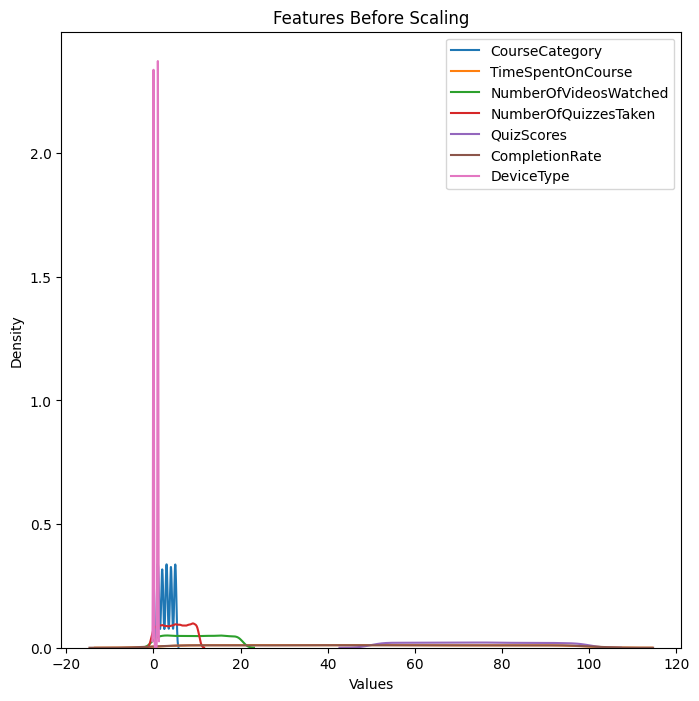

In [139]:
plt.figure(figsize=(8, 8))
plt.title("Features Before Scaling")
plt.xlabel("Values")

for column in x_train.columns:
    sns.kdeplot(x_train[column], label=column, clip=(-50, 150
    ))

plt.legend()
plt.show()

In [140]:
scaler = StandardScaler()

# Prevent the scaler from converting our DataFrame into a NumpyArray
for column in x_train.columns:
    x_train[column] = scaler.fit_transform(x_train[[column]])
    x_test[column] = scaler.transform(x_test[[column]])

x_train.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType
6317,-0.001270,-0.904791,-1.330809,0.915055,1.279433,1.044061,0.992528
740,0.702014,0.643230,-0.336190,-0.667781,-0.699277,0.994046,0.992528
3781,0.702014,-1.002547,1.653047,1.548189,-0.297864,0.590258,0.992528
7850,-0.001270,0.137928,-1.165039,-0.984348,-0.436482,0.912891,0.992528
2963,1.405298,-1.073905,1.487277,0.281921,-0.931738,1.673900,-1.007528


/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/.virtualenvs/itj_ml_course-Htu9O0vt/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: F

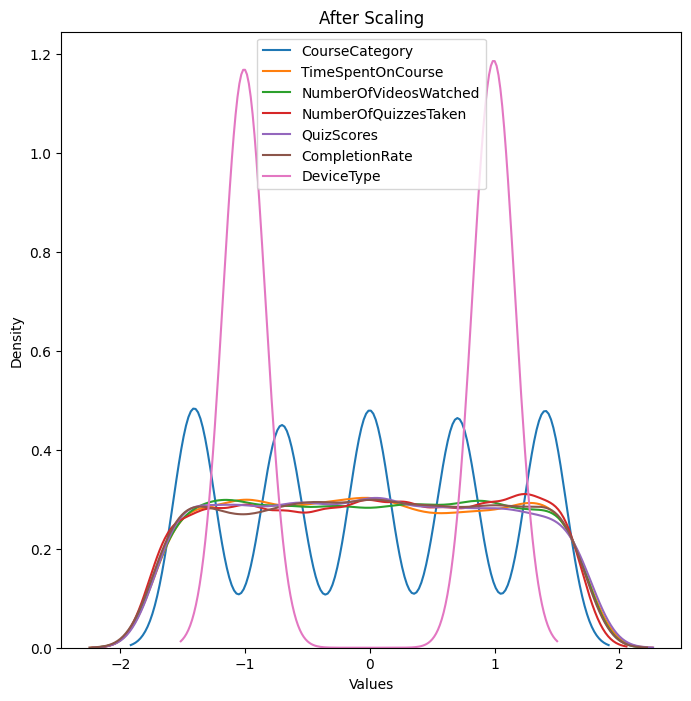

In [141]:
plt.figure(figsize=(8, 8))
plt.title("After Scaling")
plt.xlabel("Values")
for col in x_train.columns:
    sns.kdeplot(x_train[col], label=col)
plt.legend()
plt.show()

# Model training and predicting

Defining dictionary of models to use.

In [158]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": svm.SVC(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "ANN": neural_network.MLPClassifier(
        solver="lbfgs", 
        alpha=1e-5,
        hidden_layer_sizes=(64, 32), # N of layers x M number of Nuerons per layer
        random_state=1,
        max_iter=2000
    )
}

**** Model Logistic Regression ****
Model Accuracy: 0.7922222222222223
Model F1 Score: 0.7328571428571429
Confusion Matrix:
[[913 155]
 [219 513]]



**** Model SVC ****
Model Accuracy: 0.8705555555555555
Model F1 Score: 0.8332140300644238
Confusion Matrix:
[[985  83]
 [150 582]]



**** Model Decision Tree ****
Model Accuracy: 0.92
Model F1 Score: 0.9004149377593361
Confusion Matrix:
[[1005   63]
 [  81  651]]



**** Model ANN ****
Model Accuracy: 0.875
Model F1 Score: 0.8449345279117849
Confusion Matrix:
[[962 106]
 [119 613]]





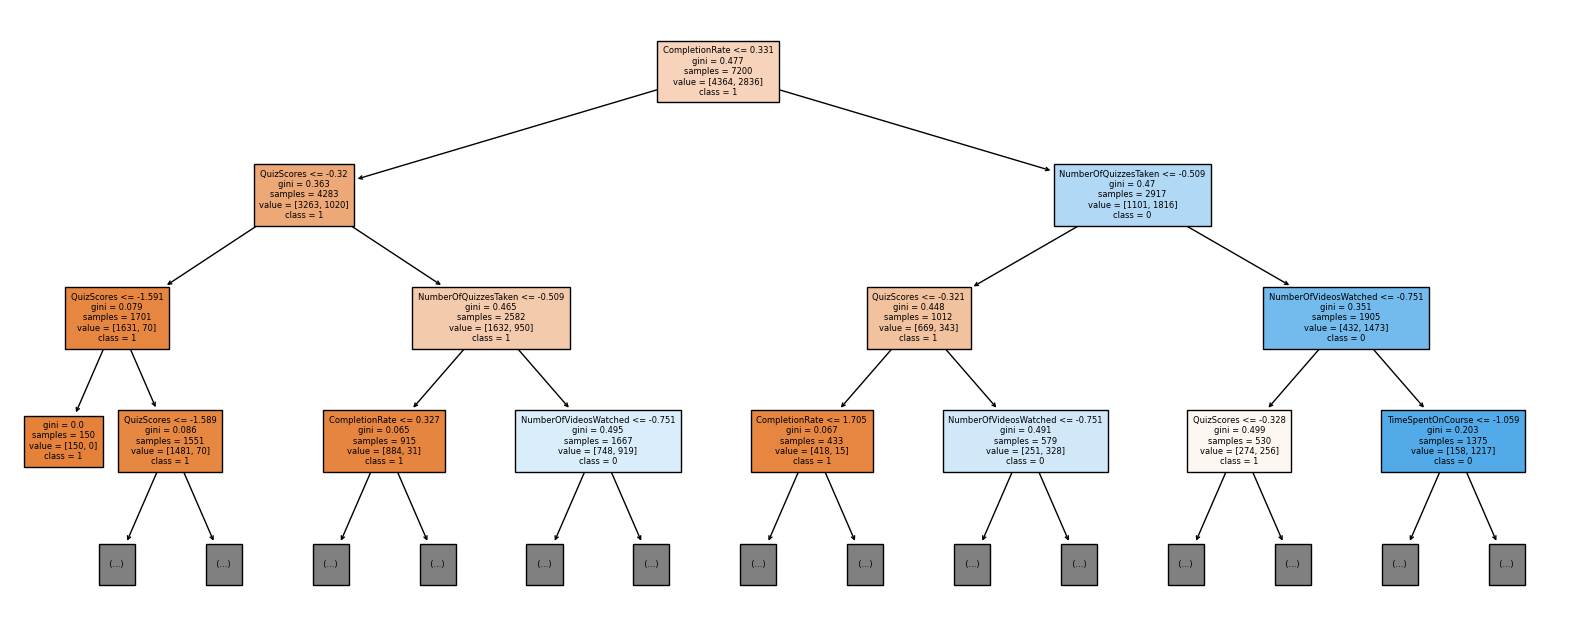

In [159]:
for name, model in models.items():
    print(f"**** Model {name} ****")

    model.fit(x_train, y_train)

    if name == "Decision Tree":
        feature_names = list(x_train.columns.values)
        class_names = [str(value) for value in y_train.unique()]
        plt.figure(figsize=(20,8))
        tree.plot_tree(
            model, 
            filled=True, 
            feature_names=feature_names, 
            max_depth=3, 
            fontsize=6, 
            class_names=class_names
        )

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy}")

    f1 = f1_score(y_test, y_pred)
    print(f"Model F1 Score: {f1}")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n\n")

# Conclusions

- The model with the best performance was the Decision Tree, followed by the Artifical Neural  Network Multi Layer Perceptron and in third place we have the SVC overpassed by the ANN by a very tiny difference.

- After experimenting with multiple values for the number of hidden layers and neurons per layer ([(5,2), (100, 100), (64, 32)]) the accuracy of the ANN remained around 85% and 88%.

- The decision tree relyed on the main variables already pointed during the correlation analysis.